Optimal Robot Capatilities Weighting: 2.7777777777777777, Optimal Robot Failure Weighting: 4.444444444444445, Optimal Field AWareness Weighting: 0.0, Minimum RMSE: 1.8231786463632706


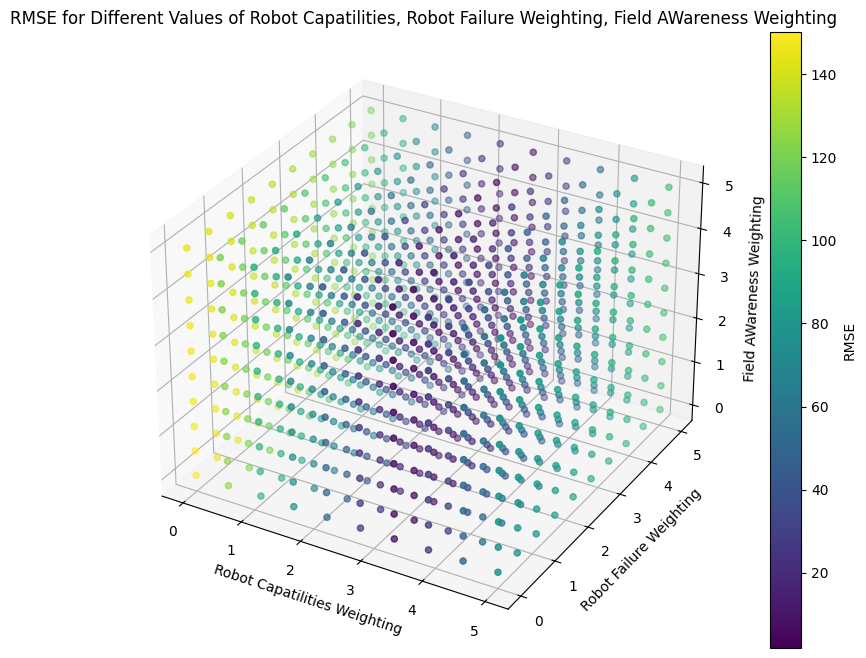

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from sklearn.metrics import mean_squared_error

# Sample data points
x = np.linspace(0, 10, 100)  # Example input data
y_actual = 3 * x**2 + 2 * x + 5  # Target data, could be your actual data

# Define the model function (modify according to your equation)
def model(x, C1, C2, C3):
    return C1 * x**2 + C2 * x + C3

# RMSE calculation function
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define ranges for C1, C2, and C3 to explore
C1_range = np.linspace(0, 5, 10)  # Adjust range and resolution as needed
C2_range = np.linspace(0, 5, 10)
C3_range = np.linspace(0, 5, 10)

# Initialize variables to store results
rmse_values = []
C1_values = []
C2_values = []
C3_values = []

# Loop through all combinations of C1, C2, C3
for C1, C2, C3 in product(C1_range, C2_range, C3_range):
    y_pred = model(x, C1, C2, C3)
    rmse = calculate_rmse(y_actual, y_pred)
    
    # Store results
    C1_values.append(C1)
    C2_values.append(C2)
    C3_values.append(C3)
    rmse_values.append(rmse)

# Find minimum RMSE and corresponding constants
min_rmse_index = np.argmin(rmse_values)
optimal_C1 = C1_values[min_rmse_index]
optimal_C2 = C2_values[min_rmse_index]
optimal_C3 = C3_values[min_rmse_index]
min_rmse = rmse_values[min_rmse_index]

print(f"Optimal Robot Capatilities Weighting: {optimal_C1}, Optimal Robot Failure Weighting: {optimal_C2}, Optimal Field AWareness Weighting: {optimal_C3}, Minimum RMSE: {min_rmse}")

# 3D plot of RMSE vs C1, C2, C3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(C1_values, C2_values, C3_values, c=rmse_values, cmap='viridis')
ax.set_xlabel("Robot Capatilities Weighting")
ax.set_ylabel("Robot Failure Weighting")
ax.set_zlabel("Field AWareness Weighting")
plt.colorbar(sc, label="RMSE")
plt.title("RMSE for Different Values of Robot Capatilities, Robot Failure Weighting, Field AWareness Weighting")
plt.show()
